Case Study: Predicting Home prices in California

In [1]:
import pandas
df = pandas.read_csv('data/cali_housing.csv')
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [2]:
len(df)

20640

In [3]:
import seaborn
from matplotlib.pyplot import get_cmap
df.plot.scatter(x='longitude',y='latitude', figsize=(10,7), alpha=0.5, s = df.population/90, c = 'median_house_value', cmap=get_cmap('jet'))

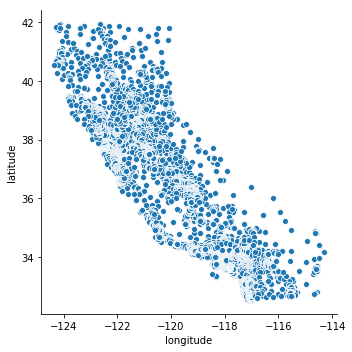

In [4]:
seaborn.relplot(x='longitude', y='latitude', data=df)

## Dealing with missing data

In [5]:
df.isnull().head()
#df.isnull().sum()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3d2dc8a58>]],
      dtype=object)

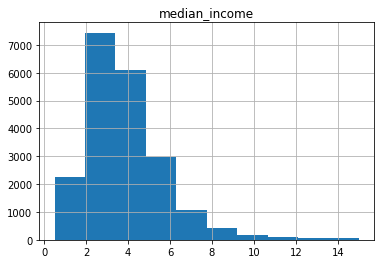

In [7]:
df[['median_income']].hist()

In [8]:
# Remove rows with missing total_bedrooms
df3 = df.drop('total_bedrooms', axis=1)
df3.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Discretization of Continuous Data

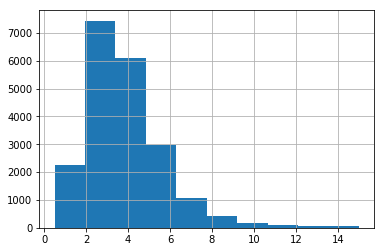

In [9]:
df.median_income.hist()

In [12]:
df.median_income.value_counts().head()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
Name: median_income, dtype: int64

In [14]:
df.median_income.describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [18]:
df['income_cat'] = pandas.cut(df.median_income, [0.49, 2.56, 3.53, 4.74, 15.0], labels=[1,2,3,4])

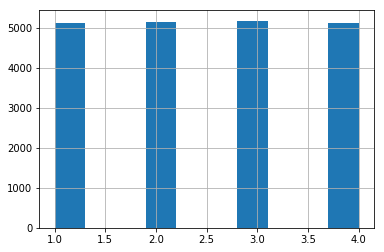

In [19]:
df.income_cat.hist()

In [21]:
import numpy
df['income_cat'] = numpy.ceil(df.median_income / 1.5)

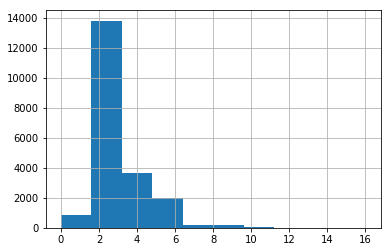

In [23]:
df.income_cat.hist(range = (0,16))

In [26]:
df.income_cat.where( df.income_cat < 6, 6).head(10)

0    6.0
1    6.0
2    5.0
3    4.0
4    3.0
5    3.0
6    3.0
7    3.0
8    2.0
9    3.0
Name: income_cat, dtype: float64

In [27]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64